In [106]:
import cv2
from matplotlib import pyplot as plt
from math import pi

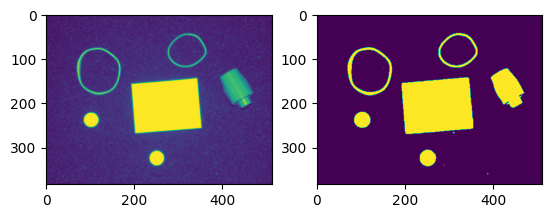

In [107]:
image = cv2.imread('pillsetc.png',cv2.IMREAD_GRAYSCALE)
image = cv2.GaussianBlur(image, (5, 5), 0)  # (5, 5) 是卷积核的大小，0 是标准差

origin = image.copy()
plt.subplot(1,2,1)
plt.imshow(image)

threshold_value = 80 

_, image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
plt.subplot(1,2,2)
plt.imshow(image)

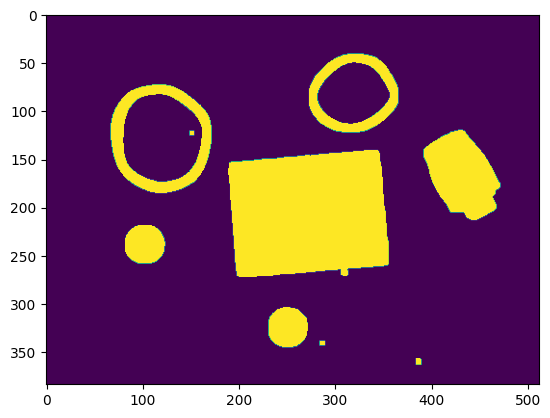

In [108]:
kernel = np.ones((3, 3), np.uint8)  # 定义腐蚀核大小
image = cv2.dilate(image, kernel, iterations=2)  # 进行腐蚀操作
plt.imshow(image)

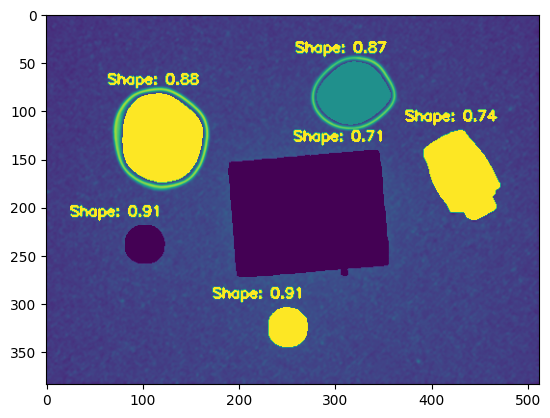

In [109]:
# 使用阈值分割图像，这里简单地使用固定阈值，你可能需要更复杂的分割算法
_, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# 寻找图像中的轮廓
contours, _ = cv2.findContours(thresholded, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

contours = [contour for contour in contours if cv2.contourArea(contour) > 100]

needed = 6

# 初始化一个白色背景
result = np.zeros_like(image)
# 为每个轮廓分配不同的颜色
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0), (255, 0, 255), (0, 255, 255), (128, 0, 128)]


for i, contour in enumerate(contours[:needed+1]):
    if i==5:
        continue
    # 为每个轮廓填充不同颜色
    cv2.drawContours(origin, [contour], -1, colors[i], -1)
    # print(contour)
    # 计算轮廓的周长和面积
    perimeter = cv2.arcLength(contour, closed=True)
    area = cv2.contourArea(contour)
    
    # 计算形状指标
    shape = 4 * pi * area / perimeter ** 2

    # 将形状指标转换为字符串
    shape_text = f"Shape: {shape:.2f}"

    # 获取轮廓的最右上角点坐标
    x, y, w, h = cv2.boundingRect(contour)
    text_x = x + w - 100  # 调整文本的X坐标位置
    text_y = y - 10  # 调整文本的Y坐标位置

    # 在图像上添加文本
    cv2.putText(origin, shape_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # plt.subplot(1,needed+1,i+1)
    # plt.imshow(origin)
    # plt.show()

plt.imshow(origin)1
plt.show()
